In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

## Bai 1

In [80]:
image_path = r'D:\py\Digital_Image_Processing\Image\lena.png'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#### A. Gaussian pyramid

G1 shape: (567, 567)
G2 shape: (284, 284)
G3 shape: (142, 142)
G4 shape: (71, 71)
G5 shape: (36, 36)


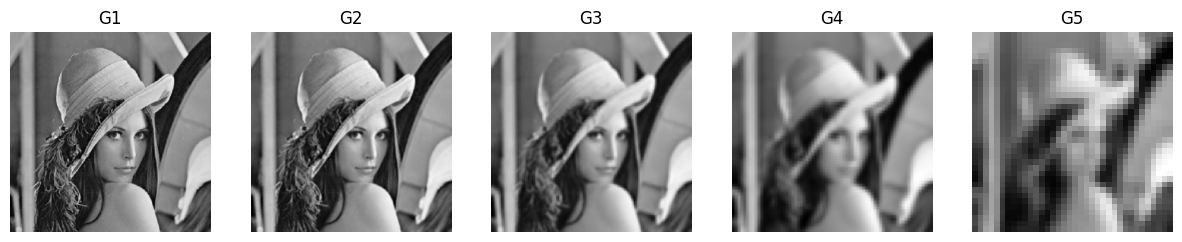

In [81]:
a = 0.4
N = 5

h = np.array([1/4 - a/2, 1/4, a, 1/4, 1/4 - a/2])
h_t = h.T
W = np.outer(h_t, h)

G = [None] * N

G[0] = I
for i in range(1, N):
    temp = convolve2d(G[i-1], W, 'same', 'symm')
    G[i] = cv2.pyrDown(temp)

plt.figure(figsize=(15, 3))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(G[i], cmap='gray')
    plt.title(f'G{i+1}')
    plt.axis('off')
    print(f'G{i+1} shape: {G[i].shape}')



#### Laplacian pyramid

L1 shape: (567, 567)
L2 shape: (284, 284)
L3 shape: (142, 142)
L4 shape: (71, 71)
L5 shape: (36, 36)


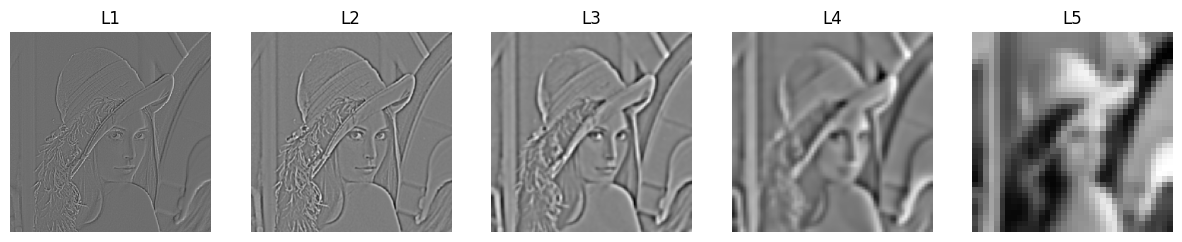

In [82]:
L = [None] * N

for i in range (N - 1):
    up = cv2.pyrUp(G[i+1])
    up = cv2.resize(up, (G[i].shape[0],G[i].shape[1]))
    L[i] = G[i] - up

L[N-1] = G[N-1]

plt.figure(figsize=(15, 3))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(L[i], cmap='gray')
    plt.title(f'L{i+1}')
    plt.axis('off')
    print(f'L{i+1} shape: {L[i].shape}')

#### Reconstruction

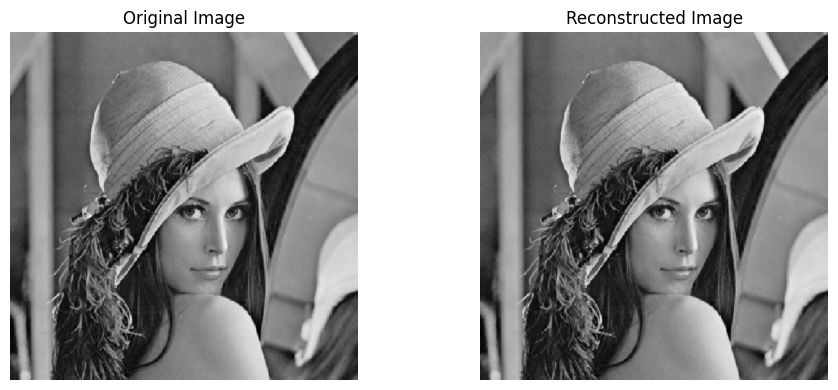

In [83]:
G_recon = [None] * N
G_recon[-1] = L[-1]  # Top level

# Reconstruct each level from top down
for i in range(N - 2, -1, -1):
    up = cv2.pyrUp(G_recon[i + 1])
    up_resized = cv2.resize(up, (L[i].shape[1], L[i].shape[0]))
    G_recon[i] = L[i] + up_resized

# Final reconstructed image
I_reconstructed = G_recon[0]

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(I_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.tight_layout()

#### Evaluate

In [88]:
psnr_val = psnr(I, I_reconstructed, data_range=1.0)  # if images are float in [0,1]
ssim_val = ssim(I, I_reconstructed, data_range=1.0)

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

PSNR: 310.11 dB
SSIM: 1.0000
